# SNR

In [35]:
%matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Ref: Gambetta et al., 2006

def n_p(chi=1, k=1, del_r=1, epsilon_rt=1):
    return epsilon_rf**2/(k**2/4+(del_r+chi)**2)

def n_m(chi=1, k=1, del_r=1, epsilon_rt=1):
    return epsilon_rf**2/(k**2/4+(del_r-chi)**2)

def Gamma_m(chi=1, k=1, del_r=1, epsilon_rt=1):
    np = n_p(chi, k, del_r, epsilon_rt)
    nm = n_m(chi, k, del_r, epsilon_rt)
    gamma = (np + nm)*k*chi**2/(k**2/4+chi**2 +del_r**2)
    
    return gamma

def SNR(chi=1, k=1, del_r=1, epsilon_rt=1, eta=1, gamma=1):
    snr = Gamma_m(chi, k, del_r, epsilon_rt) * eta / gamma
    
    return snr

Using matplotlib backend: TkAgg


In [36]:
chi, k, del_r = 1, 0.6, 1
Gamma_m(chi, k, del_r)/(n_p(chi, k, del_r) + n_m(chi, k , del_r,))

0.2870813397129187

In [37]:
chi, k, del_r = 1, 0.6, 0
Gamma_m(chi, k, del_r)/(n_p(chi, k, del_r) + n_m(chi, k , del_r,))

0.5504587155963302

In [51]:
k, del_r = 0.6, 0
chi_list = np.linspace(0.1, 5, 100)
snr_list = SNR(chi_list, k, del_r)/(n_p(chi_list, k, del_r) + n_m(chi_list, k, del_r))
plt.plot(chi_list, snr_list)

In [42]:
chi, del_r = 1, 0
k_list = np.linspace(0.1, 5, 100)
snr_list = SNR(chi, k_list, del_r)/(n_p(chi, k_list, del_r) + n_m(chi, k_list, del_r))
plt.plot(k_list, snr_list)

In [49]:
chi, k = 1, 0.1
del_r_list = np.linspace(-2, 2, 100)
snr_list = SNR(chi, k, del_r_list)/(n_p(chi, k, del_r_list) + n_m(chi, k, del_r_list))
plt.plot(del_r_list, snr_list)

# Two state histogram

<IPython.core.display.Javascript object>


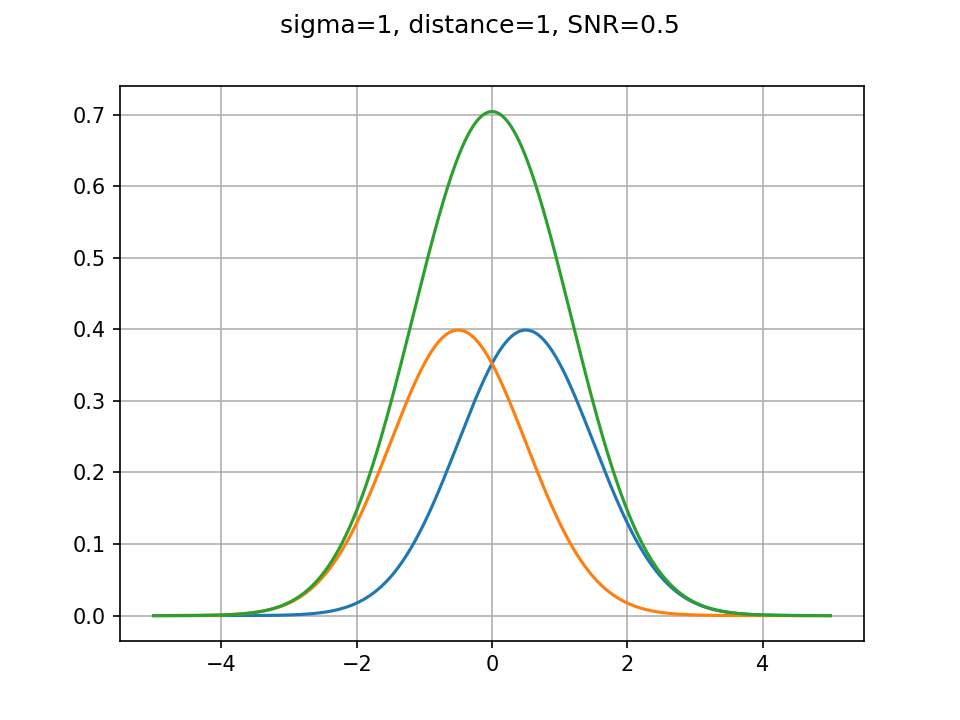

In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

sigma = 1
distance = 1# in sigma unit

x = np.linspace(-5,5, 1000)
y1 = 1/sigma/np.sqrt(2*np.pi)*np.exp(-(x-distance/2)**2/sigma**2/2)
y2 = 1/sigma/np.sqrt(2*np.pi)*np.exp(-(x+distance/2)**2/sigma**2/2)
y3 = y1 + y2

fig, ax = plt.subplots(1,1)
fig.suptitle(f'sigma={sigma}, distance={distance}, SNR={distance/sigma/2}')
ax.plot(x, y1, x, y2, x, y3)
ax.grid()


<IPython.core.display.Javascript object>


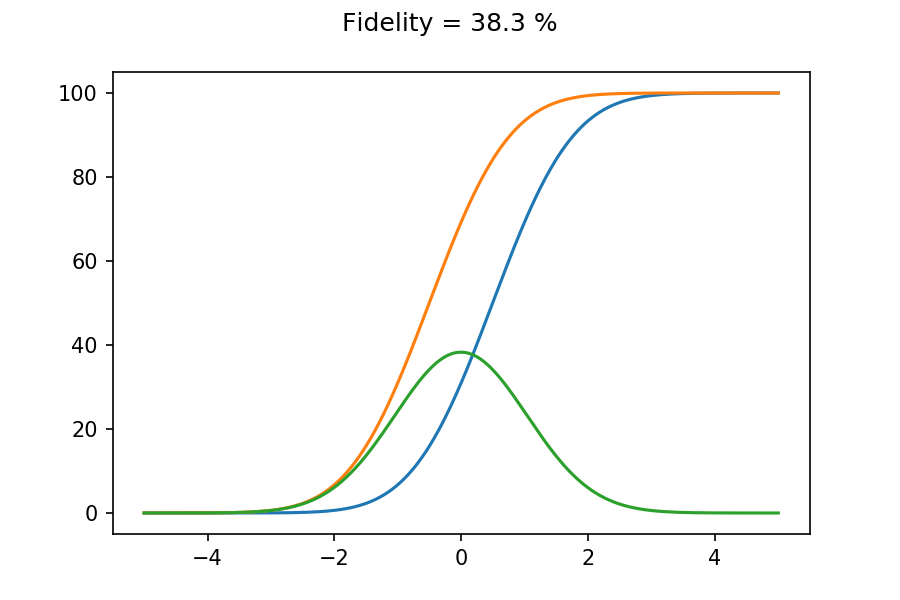

Text(0.5, 0.98, 'Fidelity = 38.3 %')

In [33]:
y1_cumsum = np.cumsum(y1)
y2_cumsum = np.cumsum(y2)
diff = y2_cumsum-y1_cumsum

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(x,y1_cumsum, x, y2_cumsum, x, diff)
fig.suptitle(f'Fidelity = {np.max(diff):.1f} %')

 # Normal distrubution 

<IPython.core.display.Javascript object>


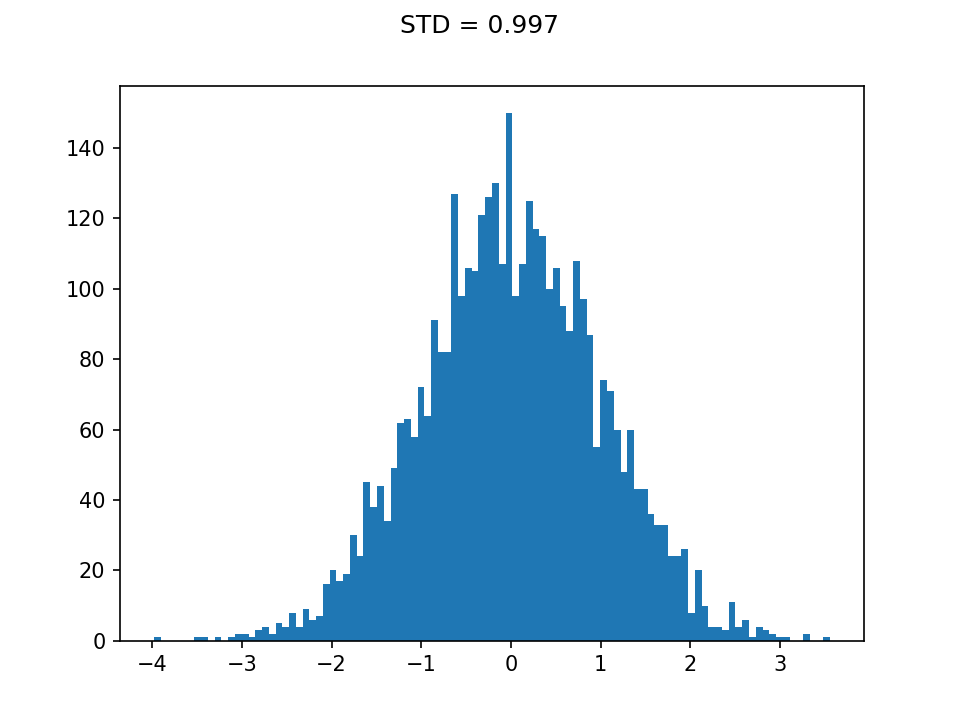

Text(0.5, 0.98, 'STD = 0.997')

In [74]:
d = np.random.normal(size=4000)
fig, ax = plt.subplots(1,1)

(y,x, _) = ax.hist(d, bins=100)
fig.suptitle(f'STD = {np.std(d):.3f}')

<IPython.core.display.Javascript object>


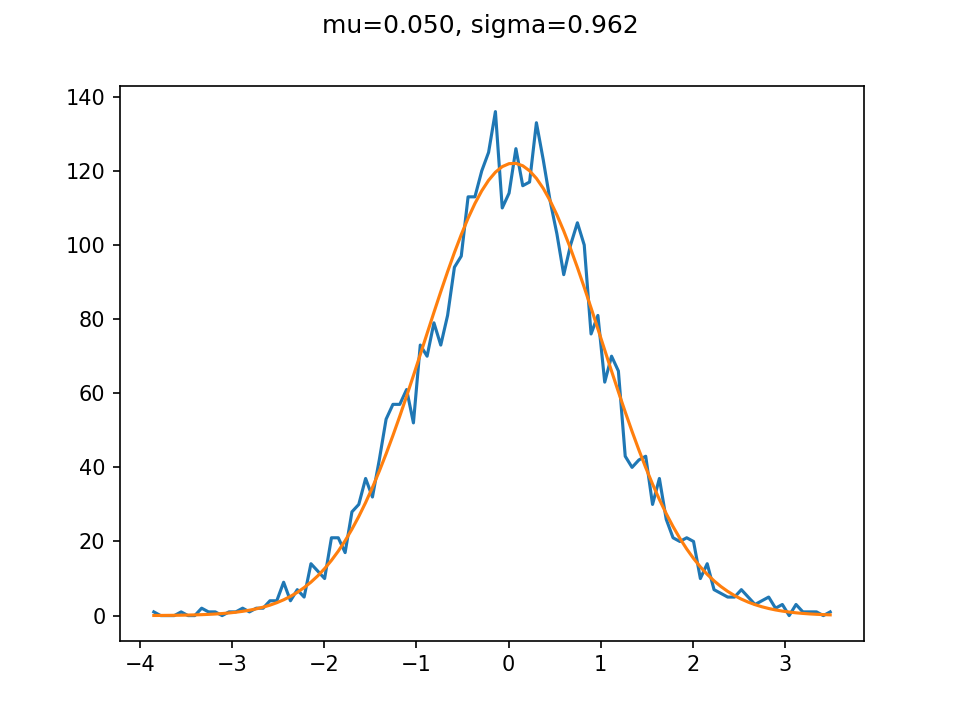

Text(0.5, 0.98, 'mu=0.050, sigma=0.962')

In [69]:
from scipy.optimize import curve_fit

def func(x, scale, mu,sigma):
    out = scale * np.exp(-((x-mu)/sigma)**2/2)

    return out

xdata, ydata = x[1:], y
popt, pcov = curve_fit(func, xdata, ydata)
ydata_fit = func(xdata, *popt)


fig, ax = plt.subplots(1,1)
ax.plot(xdata, ydata, xdata, ydata_fit)
fig.suptitle(f'mu={popt[1]:.3f}, sigma={popt[2]:.3f}')

In [65]:
popt

array([1.18885280e+02, 4.88423589e-02, 9.95154202e-01])